In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow as tf
import cv2

model_input_size = (224, 224)
model_path = 'weights/mobilenet-finetune/'

In [2]:
tf.__version__

'2.4.0-dev20201002'

In [3]:
model = tf.keras.models.load_model(model_path)

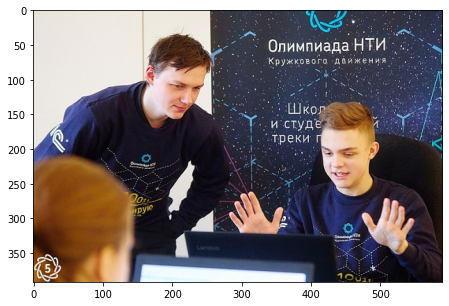

In [4]:
img = cv2.imread('data/img5.jpg')
img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

plt.figure(figsize=(10, 5))
plt.imshow(img)

In [5]:
patches_coords = [[x, x + model_input_size[0], y, y + model_input_size[1]]
                   for x in range(0, img.shape[0], model_input_size[0])
                   for y in range(0, img.shape[1], model_input_size[1])]
patches = [cv2.resize(img[c[0]:c[1], c[2]:c[3]], model_input_size) for c in patches_coords]

In [6]:
np.shape(patches)

(6, 224, 224, 3)

In [7]:
predictions = model(np.array(patches)) > 0

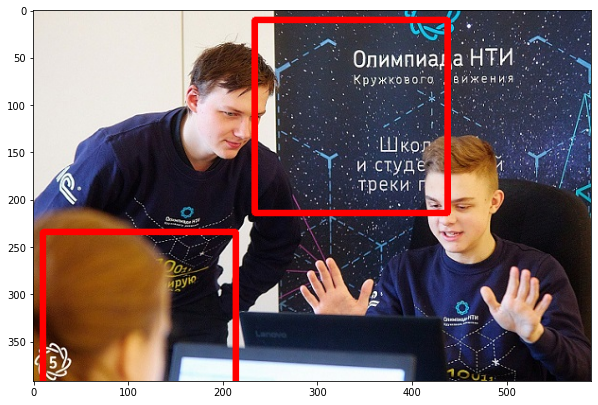

In [8]:
img_to_draw = img.copy()
for i, coords in enumerate(patches_coords):
    if predictions[i]:
        eps = 10
        img_to_draw = cv2.rectangle(img_to_draw, 
                                    (coords[2] + eps, coords[0] + eps), 
                                    (coords[3] - eps, coords[1] - eps), 
                                    (255, 0, 0), 5)
#         blended = cv2.rectangle(blended, (y, x), (y + augmented_img.shape[1], x + augmented_img.shape[0]), (255, 0, 0), 1)

plt.figure(figsize=(10, 10))

plt.imshow(img_to_draw)

IndexError: list index out of range

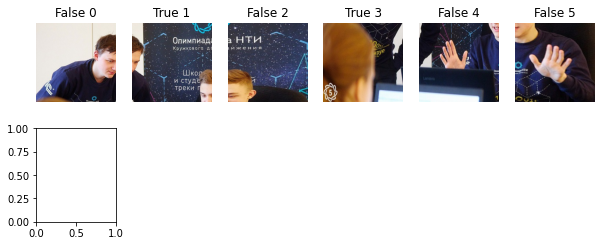

In [9]:
plt.figure(figsize=(10, 10))
for i in range(30):
    ax = plt.subplot(5, 6, i + 1)
    plt.imshow(patches[i].astype('uint8'))
    prediction = model(np.array([patches[i]]))[0][0] > 0
    plt.title(f'{prediction} {i}')
    plt.axis("off")

In [10]:
n = 15
print(model(np.array([patches[n]])))
plt.figure(figsize=(5, 5))
plt.imshow(patches[n])

IndexError: list index out of range

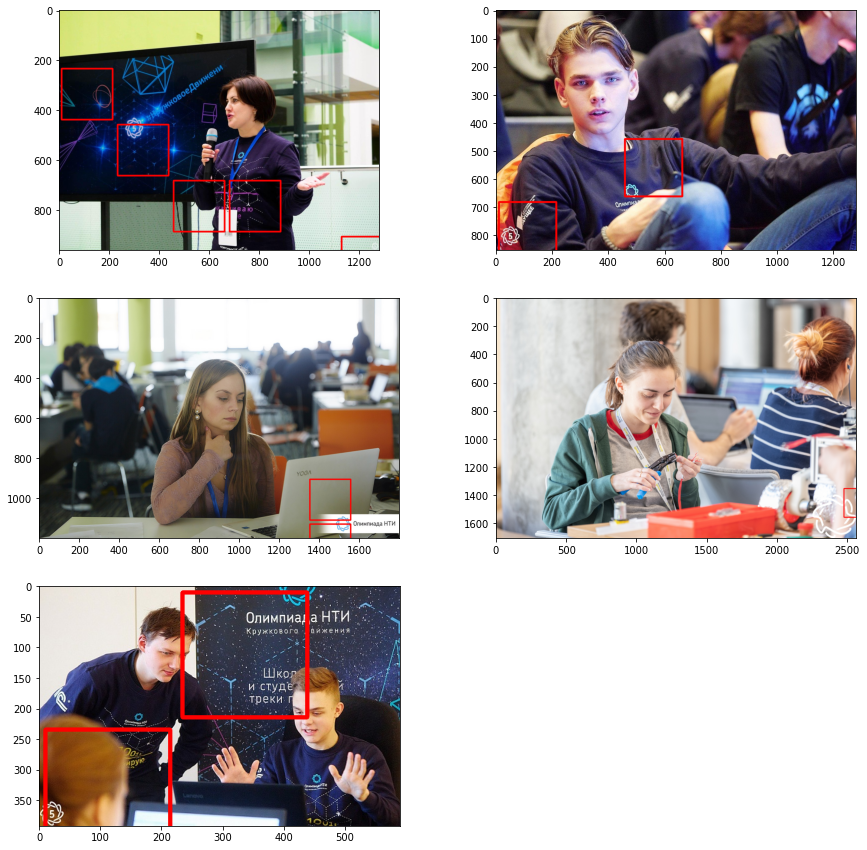

In [11]:
plt.figure(figsize=(15, 15))
for j in range(1, 6):
    img = cv2.imread(f'data/img{j}.jpg')
    img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)

    patches_coords = [[x, x + model_input_size[0], y, y + model_input_size[1]]
                       for x in range(0, img.shape[0], model_input_size[0])
                       for y in range(0, img.shape[1], model_input_size[1])]
    patches = [cv2.resize(img[c[0]:c[1], c[2]:c[3]], model_input_size) for c in patches_coords]

    predictions = model(np.array(patches)) > 0

    img_to_draw = img.copy()
    for i, coords in enumerate(patches_coords):
        if predictions[i]:
            eps = 10
            img_to_draw = cv2.rectangle(img_to_draw, 
                                        (coords[2] + eps, coords[0] + eps), 
                                        (coords[3] - eps, coords[1] - eps), 
                                        (255, 0, 0), 5)

    plt.subplot(3, 2, j)
    plt.imshow(img_to_draw)

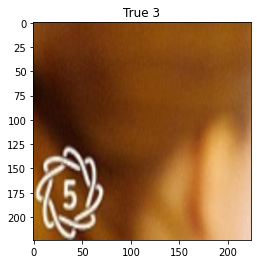

In [12]:
n = 3
img = patches[n].copy()
img = cv2.resize(img, (400, 400))[-224:, :224]
prediction = model(np.array([img]))[0][0] > 0
plt.title(f'{prediction} {n}')
plt.imshow(img)